In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression


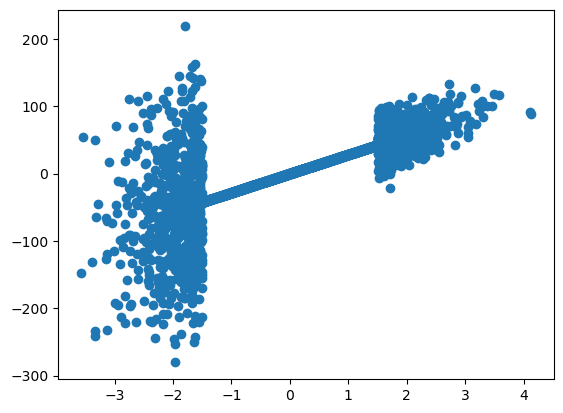

In [2]:
X, y, coef = make_regression(n_samples=10000, n_features=1, noise=0.01, random_state=2, coef=True)

upper_mask = (X >= 1.5)
lower_mask = (X <= -1.5)

upper_noise = np.random.default_rng().normal(loc=0.0, scale=20, size=np.sum(upper_mask))
y[upper_mask.flatten()] += upper_noise

lower_noise = np.random.default_rng().normal(loc=0.0, scale=80, size=np.sum(lower_mask))
y[lower_mask.flatten()] += lower_noise

plt.scatter(X, y)

In [3]:
from sklearn.model_selection import train_test_split

import sys
sys.path.append('../')

import tensorflow as tf
from evml.keras.callbacks import get_callbacks, ReportEpoch
from evml.keras.models import EvidentialRegressorDNN

In [4]:
y.reshape(-1,1)

array([[-26.33829943],
       [ -6.84999924],
       [ 13.50216978],
       ...,
       [ -1.44596296],
       [ 95.99477395],
       [  5.9299816 ]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)

In [6]:
y_train.shape

(8000, 1)

In [46]:
coupling = 2.0
mlp = EvidentialRegressorDNN(hidden_layers=2,
                            hidden_neurons=8,
                            loss='evidentialReg',
                            coupling_coef=coupling,
                            epochs = 30)

In [47]:
mlp.build_neural_network(1,1)

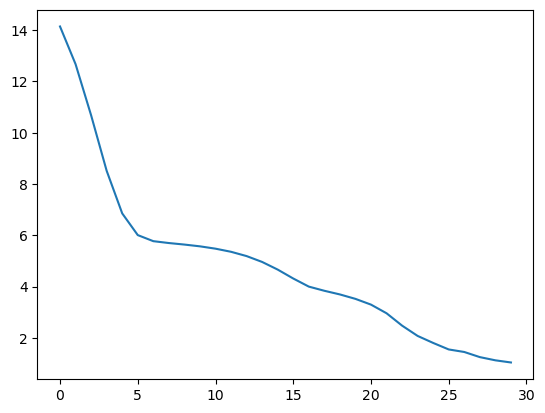

In [48]:
history = mlp.fit(X_train, y_train)
plt.plot(history.history['loss'])

63/63 [==============================] - 0s 413us/step


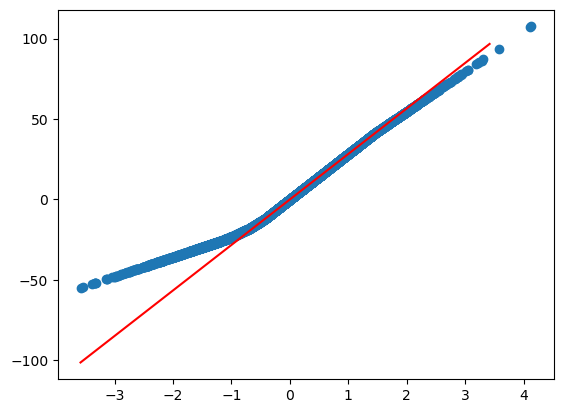

In [49]:
mu, v, alpha, beta = mlp.predict_dist_params(X_train)
plt.scatter(X_train, mu)

Xrange = np.arange(np.min(X),np.max(X))
plt.plot(Xrange, coef * Xrange, color = 'r')

In [50]:
mu, v, alpha, beta = mlp.predict_dist_params(X_test)
mu = mu.reshape(-1,1)

16/16 [==============================] - 0s 470us/step


In [51]:
#alpha = 0.5 * coupling * v
var_mu = beta / (v * (alpha - 1))
std_mu = np.sqrt(var_mu)
expected_var = beta / (alpha -1)
expected_std = np.sqrt(expected_var)

In [52]:
lower_std = 80
upper_std = 20

In [53]:
min(var_mu)

array([9.695368e-05], dtype=float32)

Text(0.5, 1.0, 'epistemic uncertainty (green)')

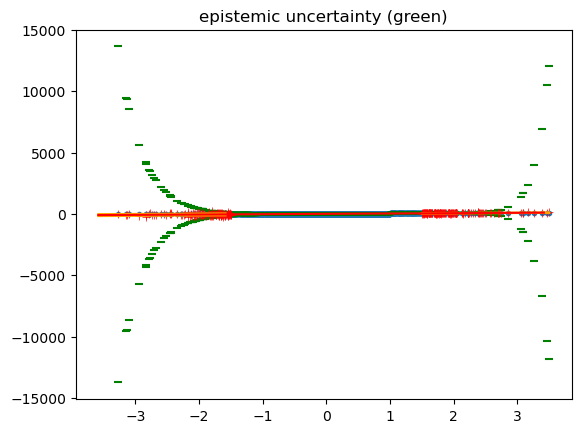

In [54]:
ax = plt.gca()

ax.scatter(X_test, mu, marker='.')
ax.scatter(X_test, mu + std_mu,c = 'g', marker='_')
ax.scatter(X_test, mu - std_mu,c ='g', marker='_')

where_noise = (X_test < -1.5) | (X_test > 1.5)
ax.scatter(X_test[where_noise], y_test[where_noise], c='r', marker='+',linewidth=0.5)

lower_x = np.arange(np.min(X), -1.5)
upper_x = np.arange(1.5, np.max(X))

ax.plot(lower_x, coef * lower_x + lower_std, color='orange')
ax.plot(upper_x, coef * upper_x + upper_std, color='orange')
ax.plot(lower_x, coef * lower_x - lower_std, color='orange')
ax.plot(upper_x, coef * upper_x - upper_std, color='orange')

ax.plot(Xrange, coef*Xrange, c='r')
ax.set_title('epistemic uncertainty (green)')

Text(0.5, 1.0, 'aleatoric uncertainty (green)')

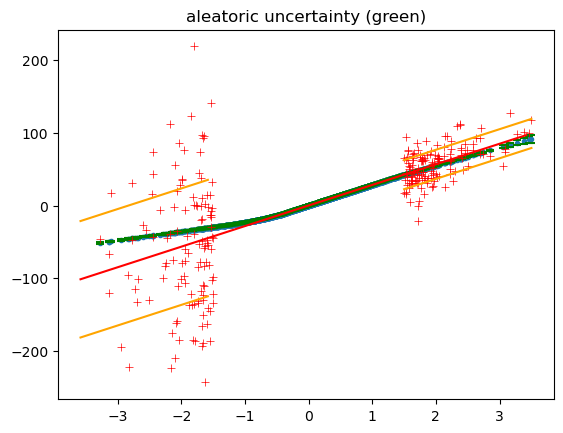

In [55]:
ax = plt.gca()

ax.scatter(X_test, mu, marker='.')
ax.scatter(X_test, mu + expected_std,c = 'g', marker='_')
ax.scatter(X_test, mu - expected_std,c ='g', marker='_')

where_noise = (X_test < -1.5) | (X_test > 1.5)
ax.scatter(X_test[where_noise], y_test[where_noise], c='r', marker='+',linewidth=0.5)

lower_x = np.arange(np.min(X), -1.5)
upper_x = np.arange(1.5, np.max(X))

ax.plot(lower_x, coef * lower_x + lower_std, color='orange')
ax.plot(upper_x, coef * upper_x + upper_std, color='orange')
ax.plot(lower_x, coef * lower_x - lower_std, color='orange')
ax.plot(upper_x, coef * upper_x - upper_std, color='orange')

ax.plot(Xrange, coef*Xrange, c='r')
ax.set_title('aleatoric uncertainty (green)')